# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

                                    Описание проекта
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. 
 
                                     Описание данных
Признаки
DateCrawled — дата скачивания анкеты из базы
VehicleType — тип автомобильного кузова
RegistrationYear — год регистрации автомобиля
Gearbox — тип коробки передач
Power — мощность (л. с.)
Model — модель автомобиля
Kilometer — пробег (км)
RegistrationMonth — месяц регистрации автомобиля
FuelType — тип топлива
Brand — марка автомобиля
NotRepaired — была машина в ремонте или нет
DateCreated — дата создания анкеты
NumberOfPictures — количество фотографий автомобиля
PostalCode — почтовый индекс владельца анкеты (пользователя)
LastSeen — дата последней активности пользователя
Целевой признак
Price — цена (евро)

## Подготовка данных

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

!pip install scikit-plot
import scikitplot as skplt
pd.set_option('display.float_format', '{:.3f}'.format) 

!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor

from catboost import Pool,CatBoost
from catboost import CatBoostRegressor
from catboost.utils import eval_metric

import time
from time import time

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv')
    
except:
    data = pd.read_csv('C:/Users/анатолий/Documents/datasets/autos.csv')

In [3]:
display(data.head(15))
data.shape

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


(354369, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
#   посмотрим на статистику
display(data.describe())
data.shape

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000,354369.000,354369.000,354369.000,354369.000,354369.000,354369.000
mean,4416.657,2004.234,110.094,128211.173,5.715,0.000,50508.689
std,4514.159,90.228,189.850,37905.342,3.726,0.000,25783.096
min,0.000,1000.000,0.000,5000.000,0.000,0.000,1067.000
25%,1050.000,1999.000,69.000,125000.000,3.000,0.000,30165.000
50%,2700.000,2003.000,105.000,150000.000,6.000,0.000,49413.000
75%,6400.000,2008.000,143.000,150000.000,9.000,0.000,71083.000
max,20000.000,9999.000,20000.000,150000.000,12.000,0.000,99998.000


(354369, 16)

На первый взгляд можно выделить следующее:

В данных присутствуют пропуски.
В цене,мощности,месяце регистрации есть значительные аномалии.
Есть столбцы не несущие целевой информации(их будем удалять).
Есть 9 object признаков данных и 7 int64.
Проблемы в столбце с годом и месяцем регистрации автомобиля.

Удалим столбцы,которые ничего не определяют в решении задачи проекта:

DateCrawled — дата скачивания анкеты из базы DateCreated — дата создания анкеты NumberOfPictures — количество фотографий автомобиля PostalCode — почтовый индекс владельца анкеты (пользователя) LastSeen — дата последней активности пользователя
Также удалим столбец с месяцем регистрации авто

In [7]:
col_droping = ['DateCrawled','DateCreated', 'PostalCode', 'LastSeen','RegistrationMonth','NumberOfPictures']
data = data.drop(col_droping, axis=1)
print(data.shape)
data.head()

(354369, 10)


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [8]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,354369.000,354369.000,354369.000,354369.000
mean,4416.657,2004.234,110.094,128211.173
std,4514.159,90.228,189.850,37905.342
min,0.000,1000.000,0.000,5000.000
25%,1050.000,1999.000,69.000,125000.000
50%,2700.000,2003.000,105.000,150000.000
75%,6400.000,2008.000,143.000,150000.000
max,20000.000,9999.000,20000.000,150000.000


In [9]:
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
NaN            37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Видим 37490 пропусков в типе ТС - удалять такое количество не очень правильно (~ 10%) поэтому заменим их уже существующим типом other.

In [10]:
data['VehicleType'] = data['VehicleType'].fillna('other')
data['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79831
wagon          65166
other          40778
bus            28775
convertible    20203
coupe          16163
suv            11996
Name: VehicleType, dtype: int64

In [11]:
data['VehicleType'].sort_values().unique()

array(['bus', 'convertible', 'coupe', 'other', 'sedan', 'small', 'suv',
       'wagon'], dtype=object)

In [12]:
data['Model'].value_counts(dropna=False)

golf                  29232
other                 24421
3er                   19761
NaN                   19705
polo                  13066
                      ...  
serie_2                   8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 251, dtype: int64

In [13]:
data['Model'] = data['Model'].fillna('other')

In [14]:
data['Gearbox'].value_counts(dropna=False)

manual    268251
auto       66285
NaN        19833
Name: Gearbox, dtype: int64

In [15]:
data['Gearbox'] = data['Gearbox'].fillna('manual')

In [16]:
data['FuelType'].value_counts(dropna=False)

petrol      216352
gasoline     98720
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [17]:
data['FuelType'] = data['FuelType'].fillna('other')

In [18]:
data['NotRepaired'].value_counts(dropna=False)

no     247161
NaN     71154
yes     36054
Name: NotRepaired, dtype: int64

In [19]:
data['NotRepaired'] = data['NotRepaired'].fillna('no')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       354369 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           354369 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             354369 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          354369 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       354369 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


C пропусками разобрались и теперь поработаем с аномалиями в численных данных

Начнем с цены авто (это целевой признак 'Price') - там есть нулевая аномалия и попробуем что то решить. Посмотрим сколько нулевых цен

In [21]:
print(data[data['Price'] == 0]['Price'].count())

10772


Количество нулевой цены 10772 и мы знаем что при прочих равных параметрах цена на авто определяется пробегом найдем эту зависимость

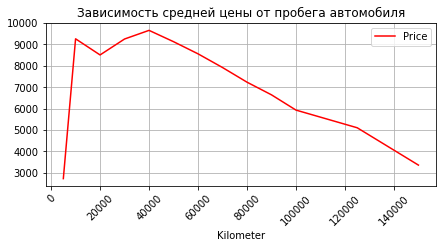

In [22]:
data.pivot_table(index='Kilometer',values='Price',aggfunc='mean').plot(y='Price',grid=True,rot=45,figsize=(7,3),\
                      title='Зависимость средней цены от пробега автомобиля',color='r');

Видим падение цены с ростом пробега.Поэтому пробуем заполнить нулевые цены средним значением,но с группировкой цены по километрам пробега.

Количество нулевых цен после обработки: 0


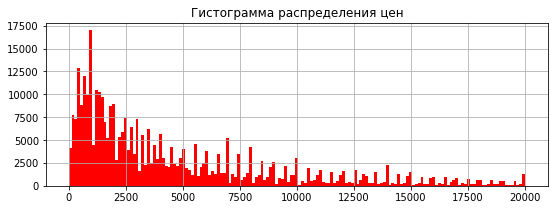

In [23]:
data['Price']=data['Price'].replace(0,None)# заменили нули на пропуски
data['Price']=data['Price'].fillna(data.groupby('Kilometer')['Price'].transform("median"))# заполнили средней ценой по пробегу
print('Количество нулевых цен после обработки:', data[data['Price'] == 0]['Price'].count())
_ = data.loc[:,['Price']].hist(figsize=(9,3),bins=157,color='r')
plt.title('Гистограмма распределения цен');

Избавились от нулевых цен и гистограмма показывает что больше всего регистрируется авто в диапазоне 1300 евро с плавным уменьшением с ростом стоимости автомобиля вплоть до 20000 евро.

In [24]:
data[data['RegistrationYear'] > 2019]['RegistrationYear'].value_counts()

9999    26
5000    17
3000     7
6000     5
7000     4
2500     4
4000     3
9000     3
5911     2
2222     2
5555     2
4500     2
2800     2
8000     2
9450     1
2290     1
6500     1
3700     1
5600     1
8500     1
3800     1
2900     1
4800     1
7500     1
3200     1
7100     1
8888     1
5300     1
4100     1
3500     1
8455     1
8200     1
9996     1
2200     1
2066     1
9229     1
5900     1
7800     1
Name: RegistrationYear, dtype: int64

In [25]:
data[data['RegistrationYear'] <=1950]['RegistrationYear'].value_counts()

1910    101
1000     37
1950     18
1937     11
1938      8
1929      7
1500      5
1800      5
1234      4
1943      4
1935      4
1945      4
1933      3
1932      3
1942      3
1930      3
1934      3
1936      3
1948      3
1111      3
1600      2
1944      2
1940      2
1928      2
1923      2
1941      2
1947      2
1300      2
1946      1
1949      1
1039      1
1931      1
1927      1
1925      1
1920      1
1919      1
1915      1
1400      1
1255      1
1253      1
1200      1
1688      1
1602      1
1001      1
Name: RegistrationYear, dtype: int64

In [26]:
a = data[data['RegistrationYear'] >=2019]['RegistrationYear']
b = data[data['RegistrationYear'] <=1950]['RegistrationYear']

In [27]:
data['RegistrationYear']=data['RegistrationYear'].replace(list(a),2007)
data['RegistrationYear']=data['RegistrationYear'].replace(list(b),1975)
data['RegistrationYear'].shape

(354369,)

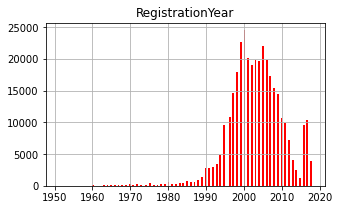

In [28]:
_ = data.loc[:,['RegistrationYear']].hist(figsize=(5,3),bins=137,color='r')

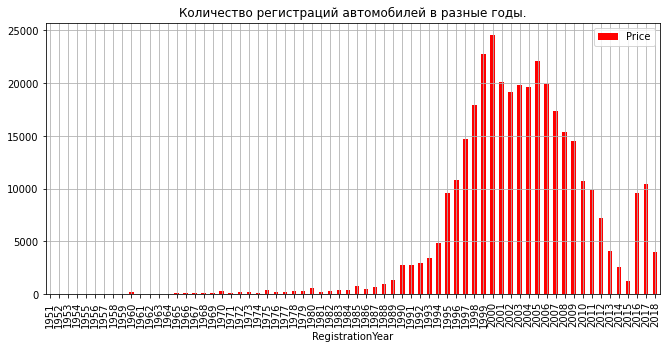

In [29]:
data.pivot_table(index='RegistrationYear',values='Price',aggfunc='count').plot(y='Price',\
                                            grid=True,rot=90,kind='bar',figsize=(11,5),\
                      title='Количество регистраций автомобилей в разные годы.',color='r');

Видим что для годов меньше 1950 и больше 2019 количество аномалий уж совсем не значительное,но удалять их не хочется. Поэтому раз уж спросить не у кого откуда они взялись и что бы это значило (можно было бы и вручную их исправить) использовал следующий подход: все аномалии больше значения года регистрации 2019 заменил на 2007 год который предкризисный в Европе и наверняка машин регистрировалось больше именно в этот период(понимаю что подтягиваю). Ну а год 1975 это уж когда в гору пошла послевоенная Германия.Наверное можно еще миллион решений придумать - но тут реально данные не очень чисты.

In [30]:
data['Power'].value_counts()

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: Power, Length: 712, dtype: int64

Посмотрим на марки машин и попробуем прикинуть по нему величину мощности двигателя

In [31]:
data['Brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

Встречаются бренды,которые предлагают мощные моторы поэтому поглядим и на модели.

In [32]:
data['Model'].sort_values().unique()

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
       'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos',
       'escort', 'espac

Видим и маломощные пластмассовые 'trabant' ну и 'porsche' с 'mercedes_benz' и 'bmw'. Модели этих брендов достаточно мощные но возьмем за предел порядка 350 л.с. это будет прям с хорошим запасом и посмотрим количества аномалий вне этих пределов

In [33]:
data[data['Power'] < 15]['Power'].count()

40538

In [34]:
data[data['Power'] > 350]['Power'].count()

1203

Опять же удалять не будем, но кажется разумным найти среднее значение мощности без учета этих аномалий и уже потом заменить аномалии этим средним значением мощности.

In [35]:
power_media = data[(data['Power'] > 35) & (data['Power'] < 350)]['Power'].median()
print('Значение медианной мощности внутри аномалий :',power_media)

Значение медианной мощности внутри аномалий : 110.0


In [36]:
val_above = data[data['Power'] > 350]['Power']
data['Power']=data['Power'].replace(list(val_above),power_media)
data['Power']=data['Power'].replace(0,power_media)
print('Количество нулевой мощности после обработки:', data[data['Power'] == 0]['Power'].count())
data.shape

Количество нулевой мощности после обработки: 0


(354369, 10)

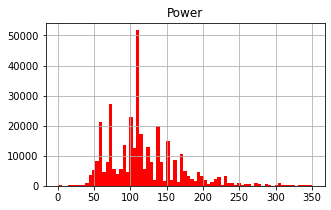

In [37]:
_ = data.loc[:,['Power']].hist(figsize=(5,3),bins=75,color='r')

Здесь замена аномалий выше 350 л.с. на медиану прошла быстро,но для мощности меньше 15 л.с. мой компьютер зависал и говорил,что не может сделать этого по причине нехватки памяти - поэтому я упростил задачу и заменил только нулевые значения . Старался делать честно.Гистограмма показала что аномалии исключены и похоже из невозможного получилось даже очень вменяемо и жизненно.

In [38]:
data.duplicated().sum()

51758

In [39]:
data=data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Посмотрим что получилось с данными после предобработки и можно ли начинать заниматься моделями

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302611 entries, 0 to 302610
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             302611 non-null  int64  
 1   VehicleType       302611 non-null  object 
 2   RegistrationYear  302611 non-null  int64  
 3   Gearbox           302611 non-null  object 
 4   Power             302611 non-null  float64
 5   Model             302611 non-null  object 
 6   Kilometer         302611 non-null  int64  
 7   FuelType          302611 non-null  object 
 8   Brand             302611 non-null  object 
 9   NotRepaired       302611 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 23.1+ MB


In [41]:
data.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

In [42]:
data.describe()

,Price,RegistrationYear,Power,Kilometer
count,302611.000,302611.000,302611.000,302611.000
mean,4665.916,2003.183,119.211,126805.404
std,4585.750,7.544,48.847,38865.752
min,1.000,1951.000,1.000,5000.000
25%,1200.000,1999.000,86.000,125000.000
50%,2990.000,2003.000,110.000,150000.000
75%,6750.000,2008.000,143.000,150000.000
max,20000.000,2018.000,350.000,150000.000


In [43]:
display(data.head())
data.shape

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,other,1993,manual,110.000,golf,150000,petrol,volkswagen,no
1,18300,coupe,2011,manual,190.000,other,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163.000,grand,125000,gasoline,jeep,no
3,1500,small,2001,manual,75.000,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69.000,fabia,90000,gasoline,skoda,no


(302611, 10)

Пропуски заполнены,аномалии обработаны но есть минимальные значения равные 1 в столбцах цены и мощности (может это у них тоже несет какой то смысл - стоимость 1 евро может оценка как подарка от родственников) Будет интересно посмотреть как модели справятся с такими ситуациямию. Приступаем.

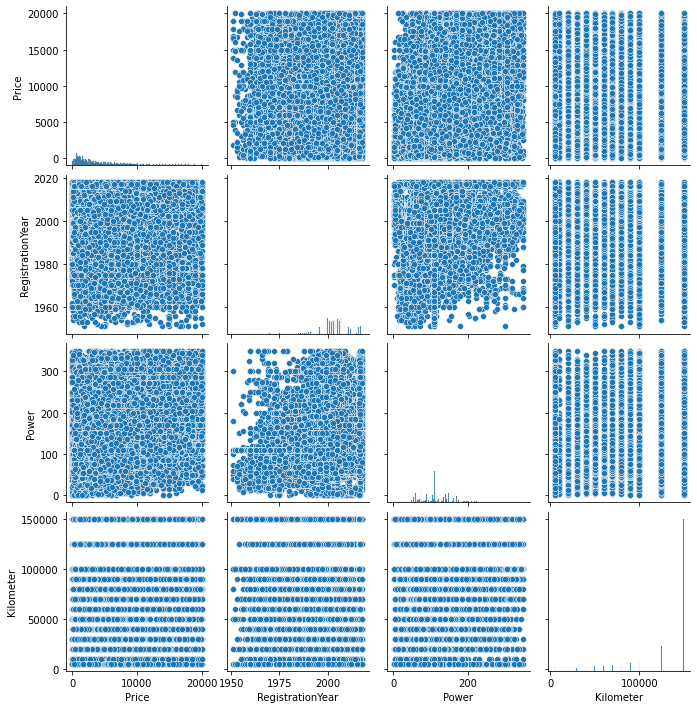

In [44]:
sns_plot = sns.pairplot(data);
sns.set(font_scale=1.3)

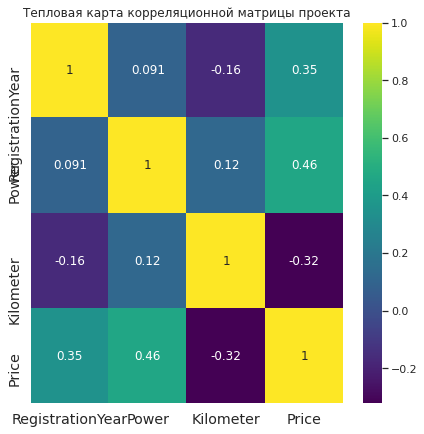

In [45]:
# строим тепловую карту корреляции признаков с целевой переменной 
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.0)
cm = np.corrcoef(data[['RegistrationYear','Power','Kilometer','Price']].values.T)
sns.heatmap(cm,annot=True, ax=ax, cmap="viridis");
ax.set_xticklabels(['RegistrationYear','Power','Kilometer','Price'])    
ax.set_yticklabels(['RegistrationYear','Power','Kilometer','Price'])
ax.set_title('Тепловая карта корреляционной матрицы проекта');
plt.show()

Видим цена обратно коррелирует с пробегом и становится больше с ростом мощности и более поздними годами регистрации.
Интересно,сможет ли алгоритм вытащить отсюда хоть какие-то закономерности

## Обучение моделей

In [46]:
data_ohe = pd.get_dummies(data,drop_first=True)

# выделим признаки и целевой показатель
features = data_ohe.drop(['Price'],axis=1)
target = data_ohe['Price']
features_train,features_test,target_train,target_test =\
                                                     train_test_split(features,target,\
                                                        test_size = 0.25,random_state = 12345)
                                                                    
print('Размер тренировочной выборки',features_train.shape, target_train.shape)
print('Размер тестовой выборки',features_test.shape, target_test.shape)  

Размер тренировочной выборки (226958, 306) (226958,)
Размер тестовой выборки (75653, 306) (75653,)


In [47]:
scaler_oe = OrdinalEncoder()
X = data.drop(['Price'],axis=1)
X = scaler_oe.fit_transform(X)
y = data['Price']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.25,random_state = 12345)                                                                                                                                      

In [48]:
%%time
#          DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()

params_grid = {'max_depth':[1,3,7,9,15]}
regressor_dtr = GridSearchCV(model_dtr, param_grid=params_grid,cv=3,verbose=1)
regressor_dtr=regressor_dtr.fit(X_train,y_train)

print(regressor_dtr.best_score_)
print(regressor_dtr.best_estimator_.get_params())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
0.7247587139396044
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
CPU times: user 3.05 s, sys: 19.3 ms, total: 3.07 s
Wall time: 3.07 s


In [49]:
%%time
dtr =DecisionTreeRegressor(**regressor_dtr.best_params_)# определили модель с лучшими параметрами
t0=time()
dtr.fit(X_train,y_train)
fit_dtr=(time()-t0)
p0=time()
pred_test = dtr.predict(X_test)
pred_train = dtr.predict(X_train)
predict_dtr = time()-p0  
MSE_train = mean_squared_error(y_train,pred_train)
MSE_test = mean_squared_error(y_test,pred_test)
print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_dtr = (MSE_test**0.5).round(3) 
print('Значение RMSE на тестовой выборке :', r_dtr)
print('Время обучения модели',fit_dtr)
print('Время предсказания модели',predict_dtr)

Значение RMSE на тренировочной выборке : 1831.36
Значение RMSE на тестовой выборке : 2302.914
Время обучения модели 0.4863879680633545
Время предсказания модели 0.04557085037231445
CPU times: user 530 ms, sys: 0 ns, total: 530 ms
Wall time: 534 ms


На простой модели и сразу требуемый результат - рассмотрим чуть подробнее

CPU times: user 3.67 s, sys: 11.7 ms, total: 3.68 s
Wall time: 3.69 s


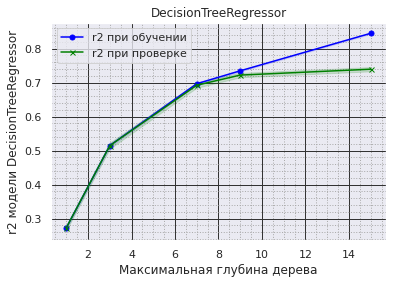

In [50]:
%%time
#         Строим кривую проверки
param_range =[1,3,7,9,15]

                     
                           
train_scores,test_scores=validation_curve(
                                         estimator=dtr,
                                         X=X,y=y,
                                         param_name='max_depth',
                                         param_range=param_range,cv=3,scoring='r2')
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1) 
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)  

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='r2 при обучении')
plt.fill_between(param_range,train_mean + train_std,
                             train_mean - train_std,
                            alpha=0.1,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='-',marker='x',markersize=5,\
                 label='r2 при проверке');
plt.fill_between(param_range,test_mean + test_std,
                             test_mean - test_std,
                 
                            alpha=0.15,color='green');
plt.minorticks_on()
plt.grid(which='major',color='#333',linewidth=1)#большая сетка 
plt.grid(which='minor',color='#aaa',ls=':')
plt.grid(True)
plt.title('DecisionTreeRegressor')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('r2 модели DecisionTreeRegressor')
plt.legend(loc='best');                 

Видим с ростом глубины дерева наблюдается дисперсия,поэтому вопрос:
стоит ли для получения большей метрики увеличивать глубину дерева или это может привести к переобучению модели и когда
необходимо прекратить.

CPU times: user 6.11 s, sys: 95.6 ms, total: 6.21 s
Wall time: 6.22 s


<AxesSubplot:title={'center':'Digits Regression Learning Curve'}, xlabel='Training examples', ylabel='Score'>

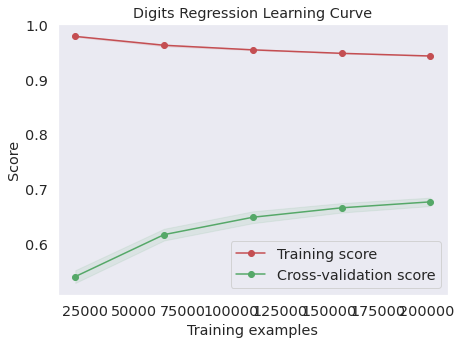

In [51]:
%%time
skplt.estimators.plot_learning_curve(DecisionTreeRegressor(), X, y,
                                     cv=3, shuffle=True, scoring="r2",
                                     n_jobs=1, figsize=(7,5), title_fontsize="large", text_fontsize="large",
                                     title="Digits Regression Learning Curve");

Наблюдаем сходимость метрики - с количеством данных все в порядке

In [52]:
%%time
#   продолжим с RandomForestRegressor 
rf_regressor = RandomForestRegressor(n_jobs=1) 

param_grid = {
    "n_estimators": [5, 15, 25],
    "max_depth": [3, 5]}
    
model_rf = RandomizedSearchCV(
    estimator=rf_regressor, param_distributions=param_grid,n_iter=3, cv=3, verbose=1, n_jobs=1,random_state=12345)

model_rf.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
CPU times: user 15.8 s, sys: 8.08 ms, total: 15.8 s
Wall time: 15.8 s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=1), n_iter=3,
                   n_jobs=1,
                   param_distributions={'max_depth': [3, 5],
                                        'n_estimators': [5, 15, 25]},
                   random_state=12345, verbose=1)

In [53]:
print(model_rf.best_score_)
print(model_rf.best_estimator_.get_params())

0.6469362565568502
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [54]:
%%time
rf_regressor =RandomForestRegressor(**model_rf.best_params_)# определили модель с лучшими параметрами
t0=time()
rf_regressor.fit(X_train,y_train)
fit_rfr=time()-t0
p0=time()
pred_test = rf_regressor.predict(X_test)
pred_train = rf_regressor.predict(X_train)
predict_rfr = time()-p0
MSE_train = mean_squared_error(y_train,pred_train)
MSE_test = mean_squared_error(y_test,pred_test)
print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_rfr = (MSE_test**0.5).round(3)
print('Значение RMSE на тестовой выборке :',r_rfr)  
print('Время обучения модели', fit_rfr)
print('Время предсказания модели', predict_rfr)

Значение RMSE на тренировочной выборке : 2723.156
Значение RMSE на тестовой выборке : 2700.443
Время обучения модели 3.5299606323242188
Время предсказания модели 0.21516156196594238
CPU times: user 3.75 s, sys: 69 µs, total: 3.75 s
Wall time: 3.75 s


Результат не удовлетворительный - надо увеличивать количество деревьев и итерaций,но очень долго будет работать 
проверено на прошлых проектах.

In [55]:
%%time
#              Простая линейная регрессия


model_lr = LinearRegression()
t0=time()
model_lr.fit(features_train,target_train)
fit_lr=time()-t0
p0=time()
pred_test = model_lr.predict(features_test)
pred_train = model_lr.predict(features_train)
predict_lr = time()-p0
MSE_train = mean_squared_error(target_train,pred_train)
MSE_test = mean_squared_error(target_test,pred_test)

print('Значение RMSE на тренировочной выборке :', (MSE_train**0.5).round(3))
r_lr = (MSE_test**0.5).round(3)
print('Значение RMSE на тестовой выборке :', r_lr) 
print('Время обучения модели', fit_lr)
print('Время предсказания модели', predict_lr)

Значение RMSE на тренировочной выборке : 2960.291
Значение RMSE на тестовой выборке : 2942.825
Время обучения модели 16.133153915405273
Время предсказания модели 0.6991879940032959
CPU times: user 12.3 s, sys: 4.6 s, total: 16.9 s
Wall time: 16.8 s


Для линейной регрессии получен результат и он нас не устроил 

Значение RMSE на тренировочной выборке : 2960.291
Значение RMSE на тестовой выборке : 2942.825

Попытки анализа моделей регрессии дали хороший результат только лишь для модели DecisionTreeRegressor. Далее будем рассматривать бустинговые модели.

Начнем с LightGBM

params - этот параметр принимает словарь, определяющий параметры алгоритма градиентных усиленных деревьев решений -просто нужно предоставить целевую функцию для начала работы на основе типа задачи (классификация/ регрессия).
train_set — этот параметр содержит информацию о значениях объектов и целевых значениях
valid_sets - список объектов, которые являются проверяющими наборами.
feature_name — список строк с имена признаков.
num_boost_round - количество  деревьев, которые будут использоваться в ансамбле.



In [56]:
print("LightGBM Version     : ", lgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

LightGBM Version     :  3.3.1
Scikit-Learn Version :  0.24.1


In [57]:
train_dataset = lgb.Dataset(features_train, target_train, feature_name=features.columns.tolist())
test_dataset = lgb.Dataset(features_test, target_test, feature_name=features.columns.tolist())


In [58]:
%%time
t0=time()
booster = lgb.train({"objective": "regression"},#  определили задачу регрессии
                    train_set=train_dataset, valid_sets=test_dataset,
                    num_boost_round=35)
fit_lgb=time()-t0

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 226958, number of used features: 288
[LightGBM] [Info] Start training from score 4663.134302
[1]	valid_0's l2: 1.84031e+07
[2]	valid_0's l2: 1.62594e+07
[3]	valid_0's l2: 1.45128e+07
[4]	valid_0's l2: 1.30818e+07
[5]	valid_0's l2: 1.19012e+07
[6]	valid_0's l2: 1.09014e+07
[7]	valid_0's l2: 1.00849e+07
[8]	valid_0's l2: 9.40218e+06
[9]	valid_0's l2: 8.7869e+06
[10]	valid_0's l2: 8.29976e+06
[11]	valid_0's l2: 7.84911e+06
[12]	valid_0's l2: 7.47509e+06
[13]	valid_0's l2: 7.16611e+06
[14]	valid_0's l2: 6.88861e+06
[15]	valid_0's l2: 6.65969e+06
[16]	valid_0's l2: 6.43995e+06
[17]	valid_0's l2: 6.26977e+06
[18]	valid_0's l2: 6.10379e+06
[19]	valid_0's l2: 5.95851e+06
[20]	val

In [59]:
p0=time()
test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)
predict_lgb = time()-p0
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds))**0.5)
r_lgb = (mean_squared_error(target_test,test_preds))**0.5
print('Значение RMSE на тестовой выборке  :' , r_lgb)
print('Время обучения модели', fit_lgb)
print('Время предсказания модели', predict_lgb)

Значение RMSE на тренировочной выборке : 2235.155663676488
Значение RMSE на тестовой выборке  : 2211.723513352265
Время обучения модели 4.886558532714844
Время предсказания модели 1.7950105667114258


Здесь поизменяли количеством деревьев и получили результат,удовлетворяющий требованию ТЗ:

[1]	Validation Set's rmse: 4289.88	Validation Set's l2: 1.84031e+07
[2]	Validation Set's rmse: 4032.3	Validation Set's l2: 1.62594e+07
[3]	Validation Set's rmse: 3809.57	Validation Set's l2: 1.45128e+07
[4]	Validation Set's rmse: 3616.88	Validation Set's l2: 1.30818e+07
[5]	Validation Set's rmse: 3449.82	Validation Set's l2: 1.19012e+07
[6]	Validation Set's rmse: 3301.73	Validation Set's l2: 1.09014e+07
[7]	Validation Set's rmse: 3175.67	Validation Set's l2: 1.00849e+07
[8]	Validation Set's rmse: 3066.3	Validation Set's l2: 9.40218e+06
[9]	Validation Set's rmse: 2964.27	Validation Set's l2: 8.7869e+06
[10]	Validation Set's rmse: 2880.93	Validation Set's l2: 8.29976e+06
[11]	Validation Set's rmse: 2801.63	Validation Set's l2: 7.84911e+06
[12]	Validation Set's rmse: 2734.06	Validation Set's l2: 7.47509e+06
[13]	Validation Set's rmse: 2676.96	Validation Set's l2: 7.16611e+06
[14]	Validation Set's rmse: 2624.62	Validation Set's l2: 6.88861e+06
[15]	Validation Set's rmse: 2580.64	Validation

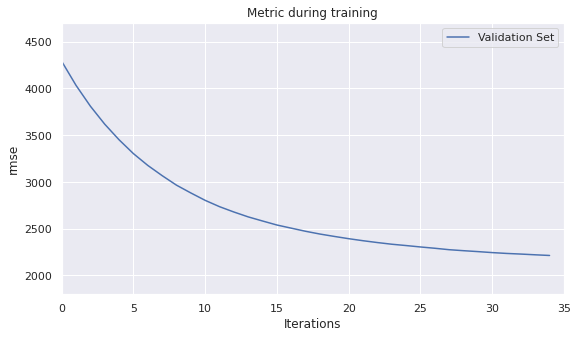

In [60]:
booster = lgb.LGBMModel(objective="regression", n_estimators=35,)

booster.fit(features_train, target_train,
            eval_set=[(features_test, target_test),], eval_metric="rmse", eval_names = ["Validation Set"],
            feature_name=features.columns.tolist())
lgb.plot_metric(booster, metric="rmse", figsize=(9,5));           

Создав и обучив модель LGBMModel мы построили график тестовых значений RMSE от количества деревьев модели - ну просто супер как все реализовано в  LightGBM.

Теперь рассмотрим CatBoost - универсальный оценщик,который может обрабатывать как классификационные,
так и регрессионные наборы данных с настройками.
Конструктор CatBoost принимает только один параметр с именем, который является словарем параметров, используемых
для создания оценщика. Он имеет один основной параметр, названный на основе значения этого параметра и
который определяет, является ли задача регрессией или классификацией. 

Начнем изучение с выбора гиперпараметров по сетке и зафиксируем их:

param_grid - принимает словарь имен параметров и список значений, которые можно попробовать для этих параметров.
features - признаки,принимает массив numpy, кадр данных панд, catboost.
target — принимает целевые значения данных. 
cv — принимает целочисленные классы сплиттеров данных (KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit).
Если мы дадим целое число в качестве входных данных, то для обучения будет создано много складок данных. Значение параметра по
умолчанию — 3.
calc_cv_statistics — принимает логическое значение, указывающее, следует ли вычислять статистику перекрестной проверки. Значениепо умолчанию — True.
refit — принимает логическое значение, указывающее, следует ли обучать модель с использованием наилучшего параметра, найденного
с помощью перекрестной проверки. Значение по умолчанию — True.
stratified — выполняет стратифицированное секционирование набора данных таким образом, чтобы пропорция класса поддерживалась в 
наборах. Значение по умолчанию — True


Список важных атрибутов и методов оценки CatBoost:

best_score_ - возвращает лучший балл модели.
classes_ -    возвращает список классов для задачи классификации.
feature_names_ —  возвращает список имен компонентов.
feature_importances_ — возвращает важность признаков.
learning_rate_ - возвращает скорость обучения алгоритма.
random_seed_ — возвращает случайное семя, из которого были назначены исходные веса модели.
tree_count_ - возвращает количество деревьев в ансамбле.
n_features_in_ — возвращает количество функций, используемых для обучения модели.
evals_result_ - возвращает словарь оценки. Если мы предоставили оценочный набор, то результаты оценки для него будут включены.


Выберем параметры CatBoost с помощью решетки

In [61]:
%%time
booster = CatBoost()

params = {
            'iterations':[10,50,150],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No'],
             
}

search_results = booster.grid_search(params, features_train, target_train, cv=5, )

print("\nЛучшие параметры модели : ", search_results['params'])

0:	learn: 6488.9305326	test: 6487.5364596	best: 6487.5364596 (0)	total: 76.1ms	remaining: 685ms
1:	learn: 6437.5975122	test: 6436.2350522	best: 6436.2350522 (1)	total: 99.7ms	remaining: 399ms
2:	learn: 6387.2205215	test: 6385.8739489	best: 6385.8739489 (2)	total: 131ms	remaining: 306ms
3:	learn: 6337.2840021	test: 6335.8806527	best: 6335.8806527 (3)	total: 155ms	remaining: 232ms
4:	learn: 6287.5584707	test: 6286.1962400	best: 6286.1962400 (4)	total: 177ms	remaining: 177ms
5:	learn: 6238.9684292	test: 6237.5438327	best: 6237.5438327 (5)	total: 199ms	remaining: 133ms
6:	learn: 6190.4758706	test: 6189.0612066	best: 6189.0612066 (6)	total: 221ms	remaining: 94.7ms
7:	learn: 6142.6882906	test: 6141.2045995	best: 6141.2045995 (7)	total: 243ms	remaining: 60.8ms
8:	learn: 6095.3372772	test: 6093.7861382	best: 6093.7861382 (8)	total: 266ms	remaining: 29.6ms
9:	learn: 6048.9513890	test: 6047.3522382	best: 6047.3522382 (9)	total: 289ms	remaining: 0us

bestTest = 6047.352238
bestIteration = 9

0:	l

In [62]:
%%time
regressor_catb =CatBoost(search_results['params'])# определяем лучшую модель модель 
t0=time()
regressor_catb.fit(features_train, target_train)
regressor_catb.set_feature_names(features.columns.tolist())
fit_cat=time()-t0

0:	learn: 4324.6134268	total: 22.4ms	remaining: 3.34s
1:	learn: 4093.8248201	total: 43.4ms	remaining: 3.21s
2:	learn: 3889.6171035	total: 65.4ms	remaining: 3.21s
3:	learn: 3720.0557935	total: 86.5ms	remaining: 3.16s
4:	learn: 3559.6883482	total: 107ms	remaining: 3.1s
5:	learn: 3429.6213010	total: 127ms	remaining: 3.05s
6:	learn: 3316.8103803	total: 148ms	remaining: 3.02s
7:	learn: 3216.6303735	total: 169ms	remaining: 3s
8:	learn: 3128.9115227	total: 191ms	remaining: 2.99s
9:	learn: 3051.5538214	total: 211ms	remaining: 2.95s
10:	learn: 2983.4136644	total: 231ms	remaining: 2.92s
11:	learn: 2924.8144869	total: 252ms	remaining: 2.9s
12:	learn: 2866.6368423	total: 274ms	remaining: 2.88s
13:	learn: 2815.1663034	total: 294ms	remaining: 2.85s
14:	learn: 2774.8449069	total: 314ms	remaining: 2.82s
15:	learn: 2734.1845792	total: 335ms	remaining: 2.8s
16:	learn: 2700.6276702	total: 360ms	remaining: 2.81s
17:	learn: 2672.6476019	total: 379ms	remaining: 2.78s
18:	learn: 2642.4899317	total: 399ms	rem

In [63]:
p0=time()
test_preds = regressor_catb.predict(features_test)
train_preds = regressor_catb.predict(features_train)
predict_cat = time()-p0
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds)**0.5).round(1))
r_cat = (mean_squared_error(target_test,test_preds)**0.5).round(1)
print('Значение RMSE на тестовой выборке  :' ,r_cat)
print('Время обучения модели', fit_cat)
print('Время предсказания модели', predict_cat)

Значение RMSE на тренировочной выборке : 2159.2
Значение RMSE на тестовой выборке  : 2135.0
Время обучения модели 4.45781135559082
Время предсказания модели 0.12813782691955566


Значение RMSE на тренировочной выборке : 2159.2
Значение RMSE на тестовой выборке  : 2135.0
Время обучения модели 5.425097942352295

Но в решетке нет параметра RMSE, поэтому можно его задать напрямую в модели - посмотрим результат при 150 итерациях функции потерь RMSE.

In [64]:
from catboost import CatBoost

booster = CatBoost(params={'iterations':150, 'verbose':10, 'loss_function':'RMSE'})

booster

In [65]:
booster.fit(features_train, target_train)
booster.set_feature_names(features.columns.tolist())


Learning rate set to 0.451083
0:	learn: 3519.5218872	total: 26.4ms	remaining: 3.94s
10:	learn: 2337.2319776	total: 274ms	remaining: 3.46s
20:	learn: 2236.6623541	total: 513ms	remaining: 3.15s
30:	learn: 2184.6917057	total: 757ms	remaining: 2.9s
40:	learn: 2153.5265565	total: 986ms	remaining: 2.62s
50:	learn: 2125.6535963	total: 1.22s	remaining: 2.36s
60:	learn: 2107.3260226	total: 1.45s	remaining: 2.11s
70:	learn: 2092.6715768	total: 1.68s	remaining: 1.87s
80:	learn: 2077.7204646	total: 1.91s	remaining: 1.63s
90:	learn: 2065.5254610	total: 2.14s	remaining: 1.39s
100:	learn: 2056.8916807	total: 2.37s	remaining: 1.15s
110:	learn: 2046.3364906	total: 2.6s	remaining: 913ms
120:	learn: 2037.2538069	total: 2.87s	remaining: 688ms
130:	learn: 2028.6877337	total: 3.11s	remaining: 452ms
140:	learn: 2022.2392106	total: 3.34s	remaining: 213ms
149:	learn: 2016.1802613	total: 3.54s	remaining: 0us


In [66]:
test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)
print('Значение RMSE на тренировочной выборке :' ,(mean_squared_error(target_train,train_preds)**0.5).round(1))
print('Значение RMSE на тестовой выборке  :' ,(mean_squared_error(target_test,test_preds)**0.5).round(1))

Значение RMSE на тренировочной выборке : 2016.2
Значение RMSE на тестовой выборке  : 2029.8


In [67]:
print("Параметры заданные при создании модели : ",booster.get_params())
print("\nВсе возможные параметры этой модели : ",booster.get_all_params())

Параметры заданные при создании модели :  {'iterations': 150, 'verbose': 10, 'loss_function': 'RMSE'}

Все возможные параметры этой модели :  {'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 150, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf'

In [68]:
print("\nЛучшая RMSE модели: ",booster.get_best_score())
print("\nКатегориальные признаки модели : ",booster.get_cat_feature_indices())
print("\nВажные признаки модели       : ",booster.get_feature_importance())


Лучшая RMSE модели:  {'learn': {'RMSE': 2016.1802613457485}}

Категориальные признаки модели :  []

Важные признаки модели       :  [3.84021960e+01 2.29549565e+01 9.22998388e+00 1.96237145e+00
 3.51455518e-01 7.90452214e+00 8.06747694e-02 5.16380082e-01
 8.75503717e-01 3.08500951e-01 9.73384111e-01 0.00000000e+00
 8.74909285e-03 8.54335796e-03 6.70907715e-03 0.00000000e+00
 6.15788142e-02 0.00000000e+00 1.34507717e-02 8.37596946e-03
 0.00000000e+00 3.74055832e-02 0.00000000e+00 2.78961195e-02
 8.31201965e-03 6.74513942e-02 0.00000000e+00 0.00000000e+00
 7.13554075e-03 3.40418797e-02 7.79901368e-03 0.00000000e+00
 0.00000000e+00 4.64674407e-03 0.00000000e+00 1.72572298e-02
 2.06435230e-03 4.96793189e-03 1.98796441e-02 1.59157405e-02
 4.59901040e-02 1.72683091e-02 3.34775205e-02 9.19742012e-02
 0.00000000e+00 0.00000000e+00 9.61184831e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.45193947e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.21023372e-

Cравним результаты RMSE для двух оценщиков с разными параметрами шага обучения.

In [69]:
booster1 = CatBoost({'verbose':0, 'iterations':100, 'learning_rate':0.1, 'bootstrap_type':'Bayesian'})
booster1.fit(features_train,target_train, eval_set=(features_test,target_test))
booster1.set_feature_names(features.columns.tolist())
test_preds = booster1.predict(features_test)
train_preds = booster1.predict(features_train)

booster2 = CatBoost({'verbose':0, 'iterations':100, 'learning_rate':0.3, 'bootstrap_type':'No'})
booster2.fit(features_train,target_train, eval_set=(features_test,target_test))
booster2.set_feature_names(features.columns.tolist())
test_preds = booster2.predict(features_test)
train_preds = booster2.predict(features_train)

In [70]:
booster1.compare(booster2, data=Pool(features_test,target_test), metrics=["R2", "RMSE", "MAE"])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [71]:
booster = CatBoost({'verbose':0, 'iterations':100})
booster.fit(features_train,target_train, eval_set=(features_test,target_test), plot=True);
booster.set_feature_names(features.columns.tolist())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

RMSE при обучении и проверки - нет слов как все удобно.

## Анализ моделей

Создадим таблицу с результатами RMSE и временем обучения моделей,но 

In [72]:
d = {'model': ['DecisionTreeRegressor','RandomForestRegressor','LinearRegression','LightGBM','CatBoost'],\
     'RMSE':[r_dtr,r_rfr,r_lr,r_lgb,r_cat], \
     'fit_time': [fit_dtr,fit_rfr,fit_lr,fit_lgb,fit_cat],\
    'predict_time':[predict_dtr,predict_rfr,predict_lr,predict_lgb,predict_cat]}

display( pd.DataFrame(data=d))

,model,RMSE,fit_time,predict_time
0,DecisionTreeRegressor,2302.914,0.486,0.046
1,RandomForestRegressor,2700.443,3.530,0.215
2,LinearRegression,2942.825,16.133,0.699
3,LightGBM,2211.724,4.887,1.795
4,CatBoost,2135.000,4.458,0.128


Общий вывод проекта.

1. Сделана предобработка данных исходя из возможностей ничего просто так не удалять.
   Пропуски заполнены,аномалии обработаны,комментарии даны.
2. Созданы модели,выбраны гиперпараметры,модели обучены и сделаны предсказания для RMSE.
3. Составлена сводная таблица по моделям,значениям RMSE и времени их обучения.

Задача проекта поставлена не совсем корректно - или мы стараемся получить одинаковое время обучения и смотрим какие значения
RMSE достигнуты или достигаем минимального значения RMSE и смотрим какое время на это потрачено,т.е. классическая проблема
что система уравнений не разрешима,когда количество неизвестных больше количества уравнений - просто пытаюсь пошутить.
Но на самом деле конечно же LightGBM и CatBoost	просто супер модели и там конечно их еще изучать и изучать.
Спасибо.